# 1.この課題の目的
フレームワークのコードを読めるようにする
フレームワークを習得し続けられるようになる
理論を知っている範囲をフレームワークで動かす
以下の要件をすべて満たしていた場合、合格とします。

※Jupyter Notebookを使い課題に沿った検証や説明ができている。

# 2.コードリーディング
TensorFLowによって2値分類を行うサンプルコードを載せました。今回はこれをベースにして進めます。

tf.kerasやtf.estimatorなどの高レベルAPIは使用していません。低レベルなところから見ていくことにします。

# 【問題1】スクラッチを振り返る
ここまでのスクラッチを振り返り、ディープラーニングを実装するためにはどのようなものが必要だったかを列挙してください。

（例）
- 重みを初期化する必要があった
- エポックのループが必要だった
それらがフレームワークにおいてはどのように実装されるかを今回覚えていきましょう。

## データセットの用意
以前から使用しているIrisデータセットを使用します。以下のサンプルコードではIris.csvが同じ階層にある想定です。

Iris Species

目的変数はSpeciesですが、3種類ある中から以下の2種類のみを取り出して使用します。
- Iris-versicolor
- Iris-virginica

## スクラッチ時に記載が必要であった内容
## ・ 各層をクラス形式で作成
## ・順伝搬、逆伝搬の処理を記載
## ・活性化関数のクラス内でオーバーフロー対策

# 【問題2】スクラッチとTensorFlowの対応を考える
以下のサンプルコードを見て、先ほど列挙した「ディープラーニングを実装するために必要なもの」がTensorFlowではどう実装されているかを確認してください。

それを簡単に言葉でまとめてください。単純な一対一の対応であるとは限りません。

サンプルコード→省略

＊バージョン1.5から1.13の間で動作を確認済みです。

## スクラッチ実装時にプログラム内で記載していた内容
### ①各層をクラス形式で作成
### ②順伝搬、逆伝搬の処理を記載
### ③活性化関数のクラス内でオーバーフロー対策

## TensorFlowではどのように実装されているか
### ①②について
- 各層のクラスを作成せずにTensorFlowのメソッドとして加算レイヤ、乗算レイヤ、活性化関数レイヤを実装している。

### ③について
- 活性化関数のオーバーフロー対策においても、TensorFlowのメソッド内で自動で最適な処理を行うよう設定されているものと思われる。

## サンプルコードの中での該当箇所
### →TensorFlowをインポート

In [1]:
# import tensorflow as tf

### →TensorFlowのメソッドを使用し加算レイヤ、乗算レイヤ、Reluレイヤを作成

In [2]:
#  layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
# layer_1 = tf.nn.relu(layer_1)
# layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
# layer_2 = tf.nn.relu(layer_2)
# layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3'] # >tf.addと+は等価である

# 3.他のデータセットへの適用
これまで扱ってきた小さなデータセットがいくつかあります。上記サンプルコードを書き換え、これらに対して学習・推定を行うニューラルネットワークを作成してください。

Iris（3種類全ての目的変数を使用）
House Prices
どのデータセットもtrain, val, testの3種類に分けて使用してください。

# 【問題3】3種類全ての目的変数を使用したIrisのモデルを作成
Iris Species

サンプルコードと同じくこの中のtrain.csvを使用してください。目的変数はSpeciesに含まれる3種類全てを使います。

2クラスの分類と3クラス以上の分類の違いを考慮してください。

それがTensorFlowでどのように書き換えられるかを公式ドキュメントなどを参考に調べてください。

ヒント

以下の2箇所は2クラス分類特有の処理です。

In [3]:
# loss_op = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=Y, logits=logits))

In [4]:
# correct_pred = tf.equal(tf.sign(Y - 0.5), tf.sign(tf.sigmoid(logits) - 0.5))

メソッドは以下のように公式ドキュメントを確認してください。

[tf.nn.sigmoid_cross_entropy_with_logits  |  TensorFlow](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)

[tf.math.sign  |  TensorFlow](https://www.tensorflow.org/api_docs/python/tf/math/sign)

＊tf.signとtf.math.signは同じ働きをします。

## 作成した3層DNNモデルの情報

| 名前                       | 値                     |
|----------------------------|------------------------|
| 学習率(learning_rate)      | 0.01                   |
| バッチサイズ(batch_size)   | 30                     |
| エポック数(num_epochs)     | 10                     |
| 第1層のノード数(n_hidden1) | 100                    |
| 第2層のノード数(n_hidden2) | 100                    |
| 第3層のノード数(n_output)  | 3                     |
| 第1層の活性化関数          | Relu関数               |
| 第2層の活性化関数          | Relu関数               |
| 第3層の活性化関数          | Softmax関数            |
| ロス関数                   | クロスエントロピー誤差 |

## 動作結果→テストデータでのAccurcy：0.933
## 以下に詳細を記載する。

## クラスのインポート/データ読み込み(特徴量を3つ使用)

In [5]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

from keras.datasets import mnist
from sklearn.preprocessing import OneHotEncoder

# データセットの読み込み
dataset_path ="Iris.csv"
df_iris = pd.read_csv(dataset_path)

Using TensorFlow backend.


In [6]:
df_iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## 数値化前のラベルを表示

In [7]:
df_iris["Species"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## 目的変数を数値に変換する→OneHotEncodingを行う

In [8]:
# データフレームから条件抽出
y = df_iris["Species"]
X = df_iris.loc[:, ["SepalLengthCm", "SepalWidthCm", "PetalLengthCm", "PetalWidthCm"]]

# OneHotEncoding
y = pd.get_dummies(y)

y = np.array(y)
X = np.array(X)

## 数値変換後の目的変数→数値に変換されている事を確認
### Iris-setosa　→　1,0,0
### Iris-versicolor　→　0,1,0
### Iris-versinica　→　0,0,1

In [9]:
y[:5]

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

## データを分割

In [10]:
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

## テスト用データ→元データの2割のデータ

In [11]:
X_test.shape

(30, 4)

In [12]:
y_test.shape

(30, 3)

## 学習用データ→元データの6割のデータ

In [13]:
X_train.shape

(96, 4)

In [14]:
y_train.shape

(96, 3)

## 検証用データ→元データの2割のデータ

In [15]:
X_val.shape

(24, 4)

In [16]:
y_val.shape

(24, 3)

## GetMiniBatchクラス

In [17]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)
    def __len__(self):
        return self._stop
    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        
    def __iter__(self):
        self._counter = 0
        return self
    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]

## iris_three_classメソッド

In [18]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 30
num_epochs = 10

n_hidden1 = 100
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 3

# 計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)

"""
計算グラフの作成
"""

def iris_three_class(x):
    """
    単純な3層ニューラルネットワーク
    """

    # 重みとバイアスの初期値の設定
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }

    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_output = tf.matmul(layer_2, weights['w3']) + biases['b3'] # tf.addと+は等価である

    return layer_output

"""
目的関数・最適化手法・推定方法・指標値の設定
"""

# ネットワーク構造の読み込み                               
logits = iris_three_class(X)

# 目的関数(tf.nn.softmax_cross_entropy_with_logitsメソッドを使用)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits))

# 最適化手法(AdamOptimizer : 学習率　パラメータlearning_rateで指定)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)

# ロス関数を最小化するようにパラメータを更新し続ける
train_op = optimizer.minimize(loss_op)

# 推定結果(正解データ、学習データ共にOneHotEncodingをしている為、
# それぞれの最大値(値が1となっている箇所)のindexが同じ値であるかで正解データと推定データが正しいかを判別
correct_pred = tf.equal(tf.argmax(Y,1) ,tf.argmax(tf.nn.softmax(logits),1))

# 指標値計算(Accuracy)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# variableの初期化
init = tf.global_variables_initializer()


"""
計算グラフの実行
"""
# 計算グラフの実行
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        # エポックごとにループ
        total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
        total_loss = 0
        total_acc = 0
        
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # ミニバッチごとにループ
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss, acc = sess.run([loss_op, accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
            total_acc += acc
            
        total_loss /= n_samples
        total_acc /= n_samples
        val_loss, val_acc = sess.run([loss_op, accuracy], feed_dict={X: X_val, Y: y_val})
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}, val_acc : {:.3f}".format(epoch, loss, val_loss, acc, val_acc))
    test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
    print("test_acc : {:.3f}".format(test_acc))

Instructions for updating:
Colocations handled automatically by placer.
Epoch 0, loss : 56.6898, val_loss : 105.2788, acc : 0.167, val_acc : 0.375
Epoch 1, loss : 11.0159, val_loss : 11.3799, acc : 0.500, val_acc : 0.667
Epoch 2, loss : 7.5206, val_loss : 19.9763, acc : 0.667, val_acc : 0.542
Epoch 3, loss : 18.2639, val_loss : 19.0843, acc : 0.167, val_acc : 0.625
Epoch 4, loss : 0.6488, val_loss : 12.0050, acc : 0.833, val_acc : 0.667
Epoch 5, loss : 1.3721, val_loss : 10.9525, acc : 0.667, val_acc : 0.708
Epoch 6, loss : 0.0000, val_loss : 7.1667, acc : 1.000, val_acc : 0.667
Epoch 7, loss : 1.8536, val_loss : 11.3188, acc : 0.833, val_acc : 0.708
Epoch 8, loss : 0.0000, val_loss : 2.9498, acc : 1.000, val_acc : 0.917
Epoch 9, loss : 0.0000, val_loss : 2.3530, acc : 1.000, val_acc : 0.833
test_acc : 0.933


# 【問題4】House Pricesのモデルを作成
回帰問題のデータセットであるHouse Pricesを使用したモデルを作成してください。

House Prices: Advanced Regression Techniques

この中のtrain.csvをダウンロードし、目的変数としてSalePrice、説明変数として、GrLivAreaとYearBuiltを使ってください。説明変数はさらに増やしても構いません。

分類問題と回帰問題の違いを考慮してください。

## 作成した3層DNNモデルの情報

| 名前                       | 値                     |
|----------------------------|------------------------|
| 学習率(learning_rate)      | 0.001                   |
| バッチサイズ(batch_size)   | 10                     |
| エポック数(num_epochs)     | 1000                  |
| 第1層のノード数(n_hidden1) | 100                    |
| 第2層のノード数(n_hidden2) | 100                    |
| 第3層のノード数(n_output)  | 1                     |
| 第1層の活性化関数          | Relu関数               |
| 第2層の活性化関数          | Relu関数               |
| 第3層の活性化関数          | Relu関数            |
| ロス関数                   | MeanSquaredError |

## 動作結果→残差プロットにて動作を確認
## 以下に詳細を記載する。

## データ準備

In [19]:
dataset_path ="train.csv"
df_saleprice = pd.read_csv(dataset_path)

In [20]:
df_saleprice.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## 特徴量抽出

In [21]:
# データフレームから条件抽出
y = df_saleprice.loc[:, ["SalePrice"] ]
X = df_saleprice.loc[:, ["GrLivArea", "YearBuilt"]]
# X = df_saleprice.iloc[:, 1:-1]

# y = np.array(y)
# X = np.array(X)

## 欠損値の有無を確認→特徴量・目的変数、共に欠損値無し

In [23]:
y.isnull().sum()

SalePrice    0
dtype: int64

In [24]:
X.isnull().sum()

GrLivArea    0
YearBuilt    0
dtype: int64

## Numpy配列化

In [25]:
y = np.array(y)
X = np.array(X)

## データを分割

In [26]:
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
# さらにtrainとvalに分割
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=0)

In [27]:
X_test.shape

(292, 2)

In [28]:
y_test.shape

(292, 1)

## example_net_homepriceメソッド

In [29]:
# ハイパーパラメータの設定
learning_rate = 0.001
batch_size = 10
num_epochs = 1000

n_hidden1 = 100
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 1

# 計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)


def example_net_homeprice(x):
    """
    単純な3層ニューラルネットワーク
    """

    # 重みとバイアスの宣言
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }

    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_output = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']) # tf.addと+は等価である
    layer_output = tf.nn.relu(layer_output)
    return layer_output

# ネットワーク構造の読み込み                               
logits = example_net_homeprice(X)

# 目的関数(tf.nn.softmax_cross_entropy_with_logitsメソッドを使用)
# loss_op = tf.reduce_mean(tf.losses.mean_squared_error(labels=Y, predictions=logits))
loss_op = tf.losses.mean_squared_error(labels=Y, predictions=logits)
# 最適化手法
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# 推定結果
correct_pred = logits

# variableの初期化
init = tf.global_variables_initializer()

# 計算グラフの実行
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        # エポックごとにループ
        total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
        total_loss = 0
        
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # ミニバッチごとにループ
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss = sess.run(loss_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
            
        total_loss /= n_samples
        val_loss = sess.run(loss_op, feed_dict={X: X_val, Y: y_val})
        if epoch != 0 and epoch % 100 == 0:
            print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}".format(epoch, loss, val_loss))
#     test_acc = sess.run(accuracy, feed_dict={X: X_test, Y: y_test})
#     print("test_acc : {:.3f}".format(test_acc))

# y_pred = example_net_homeprice(X_test)
# print('y_pred={}'.format(y_pred))

    y_pred_train = sess.run(correct_pred, feed_dict={X: X_train})
    y_pred_test = sess.run(correct_pred, feed_dict={X: X_test})

Instructions for updating:
Use tf.cast instead.
Epoch 100, loss : 1260628352.0000, val_loss : 2493803264.0000
Epoch 200, loss : 1236413056.0000, val_loss : 2491533568.0000
Epoch 300, loss : 1229892352.0000, val_loss : 2484672000.0000
Epoch 400, loss : 1227163520.0000, val_loss : 2486336512.0000
Epoch 500, loss : 1218668544.0000, val_loss : 2485146880.0000
Epoch 600, loss : 1213427456.0000, val_loss : 2482671616.0000
Epoch 700, loss : 1207498368.0000, val_loss : 2476397056.0000
Epoch 800, loss : 1204562816.0000, val_loss : 2475520256.0000
Epoch 900, loss : 1195608576.0000, val_loss : 2472545536.0000


## 残差プロットの表示

Text(0.5, 1.0, 'Residual Plots')

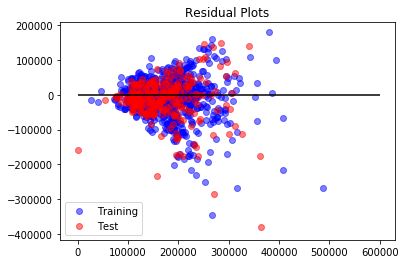

In [30]:
train = plt.scatter(y_pred_train,(y_pred_train - y_train),c='b',alpha=0.5)
test = plt.scatter(y_pred_test,(y_pred_test - y_test),c='r',alpha=0.5)
plt.hlines(y=0,xmin=-10,xmax=600000)
plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')

# 【問題5】MNISTのモデルを作成
ニューラルネットワークのスクラッチで使用したMNISTを分類するモデルを作成してください。

3クラス以上の分類という点ではひとつ前のIrisと同様です。入力が画像であるという点で異なります。

スクラッチで実装したモデルの再現を目指してください。

## 作成した3層DNNモデルの情報

| 名前                       | 値                     |
|----------------------------|------------------------|
| 学習率(learning_rate)      | 0.01                   |
| バッチサイズ(batch_size)   | 10                     |
| エポック数(num_epochs)     | 1000                  |
| 第1層のノード数(n_hidden1) | 50                    |
| 第2層のノード数(n_hidden2) | 100                    |
| 第3層のノード数(n_output)  | 1                     |
| 第1層の活性化関数          | Relu関数               |
| 第2層の活性化関数          | Relu関数               |
| 第3層の活性化関数          | SoftMax関数            |
| ロス関数                   | クロスエントロピー誤差|

## 動作結果→テストデータでのAccurcy：0.905
## 以下に詳細を記載する。

## データ読み込み

In [31]:
# X_train, y_train→学習・検証用　
# X_val, y_val→テスト用
(X_train, y_train), (X_val, y_val) = mnist.load_data()

## データの情報を確認

In [32]:
print(X_train.shape) # (60000, 28, 28)
print(X_test.shape) # (10000, 28, 28)
print(X_train[0].dtype) # uint8
print(X_train[0])

(60000, 28, 28)
(292, 2)
uint8
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18

## 平滑化→(サンプル数, 784)に変更

In [33]:
X_train = X_train.reshape(-1, 784)
X_val = X_val.reshape(-1, 784)

## 機会学習モデルで学習させる為、特徴量データを0〜1のfloat型に変換

In [34]:
X_train = X_train.astype(np.float)
X_val = X_val.astype(np.float)
X_train /= 255
X_val /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


## クロスエントロピー誤差算出の為、正解データをOneHotEncodingを実施

In [35]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_val_one_hot = enc.transform(y_val[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


## 学習用・検証用データを分割

In [36]:
# trainとtestに分割
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train_one_hot, test_size=0.2, random_state=0)


In [37]:
X_train.shape

(48000, 784)

In [38]:
X_test.shape

(12000, 784)

In [39]:
y_train.shape

(48000, 10)

In [40]:
y_test.shape

(12000, 10)

## example_net_mnistメソッド

In [42]:
# ハイパーパラメータの設定
learning_rate = 0.01
batch_size = 10
num_epochs = 10

n_hidden1 = 50
n_hidden2 = 100
n_input = X_train.shape[1]
n_samples = X_train.shape[0]
n_classes = 10

# 計算グラフに渡す引数の形を決める
X = tf.placeholder("float", [None, n_input])
Y = tf.placeholder("float", [None, n_classes])

# trainのミニバッチイテレータ
get_mini_batch_train = GetMiniBatch(X_train, y_train, batch_size=batch_size)


def example_net_mnist(x):
    """
    単純な3層ニューラルネットワーク
    """

    # 重みとバイアスの宣言
    weights = {
        'w1': tf.Variable(tf.random_normal([n_input, n_hidden1])),
        'w2': tf.Variable(tf.random_normal([n_hidden1, n_hidden2])),
        'w3': tf.Variable(tf.random_normal([n_hidden2, n_classes]))
    }
    biases = {
        'b1': tf.Variable(tf.random_normal([n_hidden1])),
        'b2': tf.Variable(tf.random_normal([n_hidden2])),
        'b3': tf.Variable(tf.random_normal([n_classes]))
    }

    layer_1 = tf.add(tf.matmul(x, weights['w1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    layer_2 = tf.add(tf.matmul(layer_1, weights['w2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    layer_output = tf.add(tf.matmul(layer_2, weights['w3']), biases['b3']) # tf.addと+は等価である
    return layer_output

# ネットワーク構造の読み込み                               
logits = example_net_mnist(X)

# 目的関数(tf.nn.softmax_cross_entropy_with_logitsメソッドを使用)
loss_op = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=Y, logits=logits))
# 最適化手法
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op = optimizer.minimize(loss_op)

# 推定結果
correct_pred = tf.equal(tf.argmax(Y,1) ,tf.argmax(tf.nn.softmax(logits),1))

# 指標値計算
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

# variableの初期化
init = tf.global_variables_initializer()

# 計算グラフの実行
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(num_epochs):
        # エポックごとにループ
        total_batch = np.ceil(X_train.shape[0]/batch_size).astype(np.int)
        total_loss = 0
        total_acc = 0
        
        for i, (mini_batch_x, mini_batch_y) in enumerate(get_mini_batch_train):
            # ミニバッチごとにループ
            sess.run(train_op, feed_dict={X: mini_batch_x, Y: mini_batch_y})
            loss, acc = sess.run([loss_op,accuracy], feed_dict={X: mini_batch_x, Y: mini_batch_y})
            total_loss += loss
            total_acc += acc
#         total_loss /= n_samples
#         total_acc /= n_samples
        total_loss /= total_batch
        total_acc /= total_batch
        val_loss, val_acc = sess.run([loss_op, accuracy], feed_dict={X: X_test, Y: y_test})
        print("Epoch {}, loss : {:.4f}, val_loss : {:.4f}, acc : {:.3f}, val_acc : {:.3f}".format(epoch, loss, val_loss, acc, val_acc))

    # テスト用データで予測し、Accuracyを算出    
    test_acc = sess.run(accuracy, feed_dict={X: X_val, Y: y_val_one_hot})
    print("test_acc : {:.3f}".format(test_acc))

Epoch 0, loss : 1.0177, val_loss : 1.1287, acc : 0.600, val_acc : 0.690
Epoch 1, loss : 0.7535, val_loss : 0.9170, acc : 0.600, val_acc : 0.731
Epoch 2, loss : 0.4745, val_loss : 0.6431, acc : 0.900, val_acc : 0.821
Epoch 3, loss : 0.4998, val_loss : 0.5045, acc : 0.900, val_acc : 0.878
Epoch 4, loss : 0.4557, val_loss : 0.4920, acc : 0.900, val_acc : 0.891
Epoch 5, loss : 0.3726, val_loss : 0.3593, acc : 0.900, val_acc : 0.907
Epoch 6, loss : 0.3553, val_loss : 0.3812, acc : 0.900, val_acc : 0.908
Epoch 7, loss : 0.1426, val_loss : 0.3611, acc : 1.000, val_acc : 0.909
Epoch 8, loss : 0.4183, val_loss : 0.3387, acc : 0.900, val_acc : 0.918
Epoch 9, loss : 0.2331, val_loss : 0.4486, acc : 0.800, val_acc : 0.909
test_acc : 0.905
